In [206]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [83]:
coord.head()

,WTG,Alt.,Lat.,Long.
0,TOR,41.5,-4.190,-38.080
1,W01,33.9,-4.185,-38.084
2,W02,32.5,-4.183,-38.086
3,W03,42.6,-4.183,-38.088
4,W04,42.1,-4.184,-38.087


In [ ]:
lat = coord['Lat.'].values
long = coord['Long.'].values

coords = []

for lat, long in zip(lat, long):
    coords.append((lat, long))

euclid_distances = pd.DataFrame(
    distance.cdist(coords, coords, 'euclidean'), 
    columns=coord['WTG'],
    index = coord['WTG'])

subset_proximity = euclid_distances[(euclid_distances <= 0.004) & (euclid_distances > 0.0)]
subset_proximity.fillna(value=0, inplace=True)
subset_proximity[subset_proximity > 0] = 1

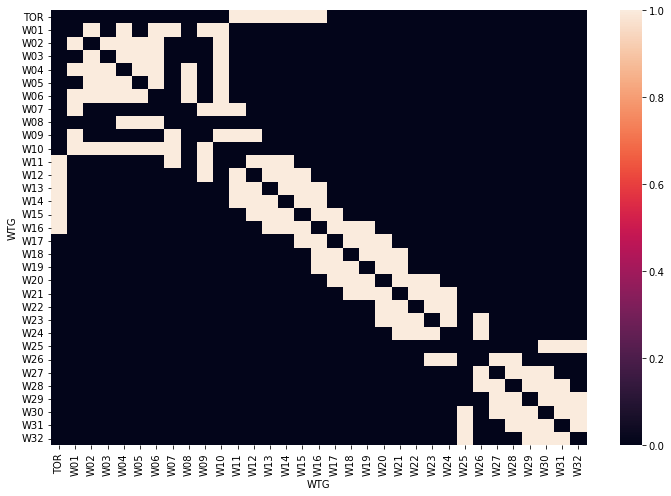

In [210]:
plt.figure(figsize=(12, 8))
sns.heatmap(subset_proximity)
plt.show()

In [123]:
px.set_mapbox_access_token('pk.eyJ1IjoiZ3N0ZWNoc2NodWx0ZSIsImEiOiJja3g0d21vZDAyZnkwMndsYTM0ZjY0cHYwIn0.zEAHc1MIWOrqUbfPe1pB8g')

fig = px.scatter_mapbox(coord, lat="Lat.", lon="Long.",color="WTG",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20,zoom=12)
fig.show()